# 1. Import and Install Dependencies

In [1]:
!python -m pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install fastdtw

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip install tensorflow scikit-learn opencv-python mediapipe matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [6]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [7]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [8]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [9]:
def draw_landmarks(image, results):
    if results.face_landmarks:
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp.solutions.face_mesh.FACEMESH_TESSELATION)  # Corrected Face Landmarks
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)  # Pose Landmarks
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)  # Left Hand Landmarks
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)  # Right Hand Landmarks


In [10]:
import cv2
import mediapipe as mp

# Initialize Mediapipe solutions
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh  # ✅ Add this for face landmarks

def draw_styled_landmarks(image, results):
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION,  # ✅ Corrected
            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
            mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
        )

    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
            mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
        )

    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
            mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
        )

    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
        )


In [11]:
import cv2
import mediapipe as mp
import numpy as np

mp_holistic = mp.solutions.holistic  # Mediapipe Holistic Model
mp_drawing = mp.solutions.drawing_utils  # Drawing utilities

# Function to detect Mediapipe landmarks
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    results = model.process(image)  # Make predictions
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert back to BGR
    return image, results

# Function to draw landmarks
def draw_styled_landmarks(image, results):
    if results.face_landmarks:
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

# Open Webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam")
else:
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                print("Failed to grab frame")
                break

            # Make detections
            image, results = mediapipe_detection(frame, holistic)
            print(results)

            # Draw landmarks
            draw_styled_landmarks(image, results)

            # Show to screen
            cv2.imshow('OpenCV Feed', image)

            # Break gracefully
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [12]:
draw_landmarks(frame, results)

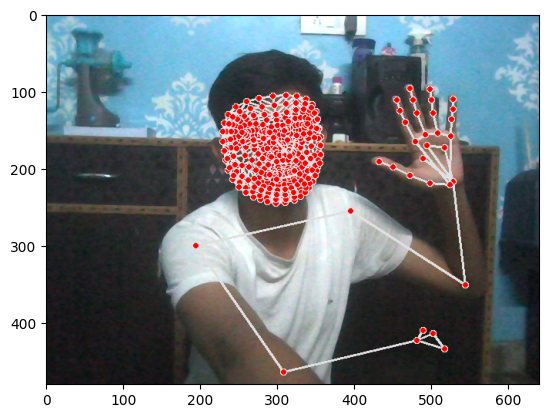

In [13]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [14]:
len(results.left_hand_landmarks.landmark)

21

In [15]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [16]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [17]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [18]:
import numpy as np

def extract_keypoints(results):
    """Extracts hand keypoints from Mediapipe results, ensuring consistent shape."""
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark], dtype=np.float32).flatten() if results.left_hand_landmarks else np.zeros(21*3, dtype=np.float32)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark], dtype=np.float32).flatten() if results.right_hand_landmarks else np.zeros(21*3, dtype=np.float32)
    
    return np.concatenate([lh, rh])  # Only hand keypoints (126 values)

In [19]:
result_test = extract_keypoints(results)

In [20]:
result_test

array([ 8.1876862e-01,  4.6231893e-01,  2.8750017e-07,  7.7891588e-01,
        4.5640171e-01, -2.0774530e-02,  7.3791784e-01,  4.3563879e-01,
       -3.1960044e-02,  7.0449930e-01,  4.1343704e-01, -4.1185062e-02,
        6.7609417e-01,  3.9852425e-01, -4.9815722e-02,  7.4862319e-01,
        3.4383953e-01, -1.5934993e-02,  7.2863942e-01,  2.9310256e-01,
       -2.8961344e-02,  7.1870399e-01,  2.6069057e-01, -4.0515505e-02,
        7.1189260e-01,  2.3168096e-01, -4.9315855e-02,  7.7001810e-01,
        3.2673511e-01, -1.6014356e-02,  7.5279039e-01,  2.6860660e-01,
       -2.6563764e-02,  7.4464190e-01,  2.3206598e-01, -3.5958100e-02,
        7.3899853e-01,  2.0127250e-01, -4.3393742e-02,  7.9418236e-01,
        3.2289380e-01, -1.9207975e-02,  7.8536510e-01,  2.6737499e-01,
       -3.1382740e-02,  7.8180486e-01,  2.3304489e-01, -3.8806330e-02,
        7.7837962e-01,  2.0368233e-01, -4.4210292e-02,  8.2077396e-01,
        3.2925084e-01, -2.4503652e-02,  8.2306117e-01,  2.8518170e-01,
      

In [21]:
np.save('0', result_test)

In [22]:
np.load('0.npy')

array([ 8.1876862e-01,  4.6231893e-01,  2.8750017e-07,  7.7891588e-01,
        4.5640171e-01, -2.0774530e-02,  7.3791784e-01,  4.3563879e-01,
       -3.1960044e-02,  7.0449930e-01,  4.1343704e-01, -4.1185062e-02,
        6.7609417e-01,  3.9852425e-01, -4.9815722e-02,  7.4862319e-01,
        3.4383953e-01, -1.5934993e-02,  7.2863942e-01,  2.9310256e-01,
       -2.8961344e-02,  7.1870399e-01,  2.6069057e-01, -4.0515505e-02,
        7.1189260e-01,  2.3168096e-01, -4.9315855e-02,  7.7001810e-01,
        3.2673511e-01, -1.6014356e-02,  7.5279039e-01,  2.6860660e-01,
       -2.6563764e-02,  7.4464190e-01,  2.3206598e-01, -3.5958100e-02,
        7.3899853e-01,  2.0127250e-01, -4.3393742e-02,  7.9418236e-01,
        3.2289380e-01, -1.9207975e-02,  7.8536510e-01,  2.6737499e-01,
       -3.1382740e-02,  7.8180486e-01,  2.3304489e-01, -3.8806330e-02,
        7.7837962e-01,  2.0368233e-01, -4.4210292e-02,  8.2077396e-01,
        3.2925084e-01, -2.4503652e-02,  8.2306117e-01,  2.8518170e-01,
      

# 4. Setup Folders for Collection

In [23]:
import os
import numpy as np

# Path for exported data
DATA_PATH = os.path.join('MP_Data')

# Actions to detect
actions = np.array(['Hello', 'Goodbye', 'Sorry', 'Thank You', 'No'])

# Number of sequences and frames per sequence
no_sequences = 30
sequence_length = 30
start_folder = 0  # Start fresh from 0

# Ensure main data folder exists
os.makedirs(DATA_PATH, exist_ok=True)

# Ensure action subfolders exist
for action in actions:
    action_path = os.path.join(DATA_PATH, action)
    os.makedirs(action_path, exist_ok=True)
    
    # Check for existing sequences
    try:
        existing_sequences = [int(seq) for seq in os.listdir(action_path) if seq.isdigit()]
        dirmax = max(existing_sequences) if existing_sequences else 0
    except ValueError:
        dirmax = 0  # If folder is empty, start from 0

    # Create new sequence folders
    for sequence in range(1, no_sequences + 1):
        sequence_path = os.path.join(action_path, str(dirmax + sequence))
        os.makedirs(sequence_path, exist_ok=True)

print("✅ Folder structure set up successfully!")


✅ Folder structure set up successfully!


In [24]:
for action in actions: 
    dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [25]:
import cv2
import numpy as np
import os
import mediapipe as mp
import time
import threading
import queue

# Initialize webcam
cap = cv2.VideoCapture(0)

# Mediapipe Model Setup
mp_holistic = mp.solutions.holistic

# Thread-safe queue for saving keypoints
keypoint_queue = queue.Queue()

# Function to save keypoints asynchronously
def save_keypoints():
    while True:
        npy_path, keypoints = keypoint_queue.get()
        if npy_path is None:  
            break  # Exit signal
        
        npy_dir = os.path.dirname(npy_path)  # ✅ Fix: Get the correct directory
        os.makedirs(npy_dir, exist_ok=True)  # ✅ Ensure directory exists

        np.save(npy_path, keypoints)  # ✅ Save keypoints correctly

# Start the keypoint saving thread
save_thread = threading.Thread(target=save_keypoints, daemon=True)
save_thread.start()

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Loop through actions
    for action in actions:
        for sequence in range(start_folder, start_folder + no_sequences):
            for frame_num in range(sequence_length):

                start_time = time.time()  # Track frame processing time
                
                # Read frame from webcam
                ret, frame = cap.read()
                if not ret:
                    print(f"⚠️ Frame {frame_num} failed to capture, skipping...")
                    continue

                # Process frame with Mediapipe
                image, results = mediapipe_detection(frame, holistic)
                draw_styled_landmarks(image, results)

                # Display every 5th frame (for smooth UI)
                if frame_num % 5 == 0:
                    cv2.putText(image, f'Collecting {action} - Video {sequence}', (15, 12), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)

                # Save keypoints in the queue
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), f"{frame_num}.npy")  # ✅ Fixed path
                keypoint_queue.put((npy_path, keypoints))  # ✅ Send to queue for saving

                # Debug frame processing time
                end_time = time.time()
                print(f"✅ Frame {frame_num} processed in {end_time - start_time:.2f} sec")

                # Handle exit key
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    keypoint_queue.put((None, None))  # Signal thread to stop
                    save_thread.join()
                    cap.release()
                    cv2.destroyAllWindows()
                    exit()

# Release resources properly
keypoint_queue.put((None, None))  # Signal thread to stop
save_thread.join()
cap.release()
cv2.destroyAllWindows()


✅ Frame 0 processed in 0.40 sec
✅ Frame 1 processed in 0.08 sec
✅ Frame 2 processed in 0.07 sec
✅ Frame 3 processed in 0.07 sec
✅ Frame 4 processed in 0.07 sec
✅ Frame 5 processed in 0.06 sec
✅ Frame 6 processed in 0.07 sec
✅ Frame 7 processed in 0.06 sec
✅ Frame 8 processed in 0.05 sec
✅ Frame 9 processed in 0.06 sec
✅ Frame 10 processed in 0.06 sec
✅ Frame 11 processed in 0.06 sec
✅ Frame 12 processed in 0.06 sec
✅ Frame 13 processed in 0.05 sec
✅ Frame 14 processed in 0.06 sec
✅ Frame 15 processed in 0.06 sec
✅ Frame 16 processed in 0.06 sec
✅ Frame 17 processed in 0.06 sec
✅ Frame 18 processed in 0.05 sec
✅ Frame 19 processed in 0.05 sec
✅ Frame 20 processed in 0.06 sec
✅ Frame 21 processed in 0.05 sec
✅ Frame 22 processed in 0.06 sec
✅ Frame 23 processed in 0.05 sec
✅ Frame 24 processed in 0.06 sec
✅ Frame 25 processed in 0.06 sec
✅ Frame 26 processed in 0.06 sec
✅ Frame 27 processed in 0.05 sec
✅ Frame 28 processed in 0.05 sec
✅ Frame 29 processed in 0.06 sec
✅ Frame 0 processed 

In [26]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [27]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
import os

In [28]:
label_map = {label:num for num, label in enumerate(actions)}

In [29]:
label_map

{'Hello': 0, 'Goodbye': 1, 'Sorry': 2, 'Thank You': 3, 'No': 4}

In [30]:
import os
import numpy as np

sequences, labels = [], []
for action in actions:
    for sequence in os.listdir(os.path.join(DATA_PATH, action)):
        window = []

        # Get sorted list of frame files
        frame_files = sorted(os.listdir(os.path.join(DATA_PATH, action, sequence)), key=lambda x: int(x.split(".")[0]))

        for frame_file in frame_files:
            file_path = os.path.join(DATA_PATH, action, sequence, frame_file)
            res = np.load(file_path)  # ✅ Load keypoints

            if res.shape[0] != 126:  # 🚨 Debugging: Ensure correct shape
                print(f"Warning: Shape mismatch in {file_path}, got {res.shape}")

            window.append(res)

        # 🛠️ Fix: Ensure window has exactly 30 frames
        while len(window) < 30:
            window.append(np.zeros(126))  # ✅ Match new keypoint shape

        window = window[:30]  # Trim to 30 frames if needed
        
        sequences.append(window)
        labels.append(label_map[action])

sequences = np.array(sequences, dtype=np.float32)  # ✅ Ensure consistent dtype
labels = np.array(labels)

print("Sequences shape:", sequences.shape)  # Debugging: Check final shape
print("Labels shape:", labels.shape)

Sequences shape: (305, 30, 126)
Labels shape: (305,)


In [31]:
np.array(labels).shape

(305,)

In [32]:
X = np.array(sequences)

In [33]:
X.shape

(305, 30, 126)

In [34]:
y = to_categorical(labels).astype(int)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [36]:
y_test.shape

(16, 5)

In [37]:
from sklearn.utils import resample
import numpy as np

def balance_classes(X, y):
    max_size = max(np.bincount(y.argmax(axis=1)))  # Get max samples in any class
    X_balanced, y_balanced = [], []

    for class_idx in np.unique(y.argmax(axis=1)):
        X_class = X[y.argmax(axis=1) == class_idx]
        y_class = y[y.argmax(axis=1) == class_idx]

        X_resampled, y_resampled = resample(X_class, y_class, replace=True, n_samples=max_size, random_state=42)

        X_balanced.append(X_resampled)
        y_balanced.append(y_resampled)

    return np.vstack(X_balanced), np.vstack(y_balanced)

# Apply oversampling
X_train_balanced, y_train_balanced = balance_classes(X_train, y_train)

print("✅ Dataset balanced: ", np.bincount(y_train_balanced.argmax(axis=1)))


✅ Dataset balanced:  [59 59 59 59 59]


In [38]:
import fastdtw
import numpy as np

SEQUENCE_LENGTH = 30  # Ensure all sequences have the same length

def normalize_gesture_speed(sequence1, sequence2):
    """Aligns two gesture sequences using Dynamic Time Warping (DTW)."""
    distance, path = fastdtw.fastdtw(sequence1, sequence2)
    
    # Extract aligned sequence
    aligned_seq = [sequence1[i] for i, _ in path]
    
    # ✅ Fix: Pad or Trim the sequence to SEQUENCE_LENGTH
    if len(aligned_seq) < SEQUENCE_LENGTH:
        # Pad with zeros if too short
        aligned_seq = np.pad(aligned_seq, ((0, SEQUENCE_LENGTH - len(aligned_seq)), (0, 0)), mode='constant')
    else:
        # Trim if too long
        aligned_seq = aligned_seq[:SEQUENCE_LENGTH]
    
    return np.array(aligned_seq)

# ✅ Apply to dataset
X_train_normalized = np.array([normalize_gesture_speed(seq, X_train_balanced[0]) for seq in X_train_balanced])
X_test_normalized = np.array([normalize_gesture_speed(seq, X_test[0]) for seq in X_test])

print("✅ Gesture speed normalized using DTW!")


✅ Gesture speed normalized using DTW!


# 7. Build and Train LSTM Neural Network

In [39]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Input, BatchNormalization, Dropout, Multiply, Permute, Softmax, Lambda
from tensorflow.keras.optimizers import AdamW
import tensorflow.keras.backend as K

# ✅ Define LSTM Input Shape
input_layer = Input(shape=(30, 126))  # 30 frames, 126 keypoints

# 🔹 LSTM Layer 1
x = LSTM(256, return_sequences=True, activation='tanh')(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

# 🔹 LSTM Layer 2
x = LSTM(128, return_sequences=True, activation='tanh')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

def squeeze_last_dim(t):
    return K.squeeze(t, -1)

def expand_last_dim(t):
    return K.expand_dims(t, axis=-1)

# ✅ Corrected Attention Mechanism
attention_probs = Dense(1, activation="sigmoid", name="attention_probs")(x)  # Generate attention scores per time step
attention_probs = Lambda(squeeze_last_dim, output_shape=(30,), name='squeeze_last_dim')(attention_probs)  
attention_probs = Lambda(expand_last_dim, output_shape=(30, 1), name='expand_last_dim')(attention_probs)

# ✅ Apply Attention to LSTM Output
attention_output = Multiply()([x, attention_probs])  # Shapes now match (batch, 30, 256)

# 🔹 LSTM Layer 3 (Process attention-weighted sequence)
x = LSTM(128, return_sequences=False, activation='tanh')(attention_output)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

# 🔹 Fully Connected Layers
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)

# 🔹 Output Layer (26 classes for sign gestures)
output_layer = Dense(5, activation='softmax')(x)

In [40]:
model = Model(inputs=input_layer, outputs=output_layer)

In [41]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [42]:
# Train-Test Split
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping,  ReduceLROnPlateau


# Split data into training (80%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

# Train the model with validation
model.fit(
    X_train, y_train,  
    epochs=500,   
    validation_data=(X_val, y_val),
    batch_size=32,  
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - categorical_accuracy: 0.2815 - loss: 1.7721 - val_categorical_accuracy: 0.2623 - val_loss: 1.5968 - learning_rate: 0.0010
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - categorical_accuracy: 0.3152 - loss: 1.4878 - val_categorical_accuracy: 0.3279 - val_loss: 1.5726 - learning_rate: 0.0010
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - categorical_accuracy: 0.3834 - loss: 1.3690 - val_categorical_accuracy: 0.3443 - val_loss: 1.5499 - learning_rate: 0.0010
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - categorical_accuracy: 0.4144 - loss: 1.3858 - val_categorical_accuracy: 0.4426 - val_loss: 1.5329 - learning_rate: 0.0010
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - categorical_accuracy: 0.4702 - loss: 1.1901 - val_categorical_accuracy: 0.3607 - val_loss: 1.5023 - learning_rate: 0.0010
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - categorical_accuracy: 0.4494 - loss: 1.1456 - val_categorical_accuracy: 0.426

In [43]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 30, 126)           │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm (LSTM)                   │ (None, 30, 256)           │         392,192 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 30, 256)           │           1,024 │ lstm[0][0]                 │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 30, 256)           │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_1 (LSTM)                 │ (None, 30, 128)           │         197,120 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 30, 128)           │             512 │ lstm_1[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 30, 128)           │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ attention_probs (Dense)       │ (None, 30, 1)             │             129 │ dropout_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ squeeze_last_dim (Lambda)     │ (None, 30)                │               0 │ attention_probs[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expand_last_dim (Lambda)      │ (None, 30, 1)             │               0 │ squeeze_last_dim[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multiply (Multiply)           │ (None, 30, 128)           │               0 │ dropout_1[0][0],           │
│                               │                           │                 │ expand_last_dim[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_2 (LSTM)                 │ (None, 128)               │         131,584 │ multiply[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 128)               │             512 │ lstm_2[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 128)               │               0 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 128)               │          16,512 │ dropout_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 2,242,452 (8.55 MB)

 Trainable params: 747,142 (2.85 MB)

 Non-trainable params: 1,024 (4.00 KB)

 Optimizer params: 1,494,286 (5.70 MB)

# 8. Make Predictions

In [44]:
threshold = 0.5  # Confidence threshold

res = model.predict(X_test)  # Get predictions for all test samples

sentence = []  # Store final detected words/characters

for i in range(len(X_test)):
    confidence = np.max(res[i])  # Highest probability for sample i
    predicted_action = actions[np.argmax(res[i])]  # Predicted action

    if confidence < threshold:
        print(f"Sample {i}: No confident prediction")
        continue  # Skip uncertain predictions

    # Convert "space" to an actual space
    if predicted_action == "space":
        predicted_action = " "

    # Avoid consecutive spaces
    if len(sentence) == 0 or not (sentence[-1] == " " and predicted_action == " "):
        sentence.append(predicted_action)

final_text = "".join(sentence)  # Convert list to readable text
print(f"Final Prediction: {final_text}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
Sample 0: No confident prediction
Sample 1: No confident prediction
Sample 2: No confident prediction
Sample 4: No confident prediction
Sample 5: No confident prediction
Sample 7: No confident prediction
Sample 13: No confident prediction
Sample 14: No confident prediction
Final Prediction: GoodbyeHelloHelloHelloGoodbyeNoNoSorry


# 9. Save Weights

In [45]:
model.save('Predictions.h5')

In [46]:
model.load_weights('Predictions.h5')
print("Model weights loaded successfully!")


Model weights loaded successfully!


# 10. Evaluation using Confusion Matrix and Accuracy

In [47]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [48]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [49]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [50]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[13,  0],
        [ 0,  3]],

       [[11,  0],
        [ 3,  2]],

       [[ 7,  7],
        [ 0,  2]],

       [[14,  0],
        [ 2,  0]],

       [[12,  0],
        [ 2,  2]]], dtype=int64)

In [51]:
accuracy_score(ytrue, yhat)

0.5625

# 11. Test in Real Time

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [53]:
from scipy import stats

In [54]:
colors = [(245,117,16), (117,245,16), (16,117,245)]  # Base colors

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    
    for num, prob in enumerate(res):
        if num >= len(colors):  # Prevents IndexError
            print(f"⚠️ Warning: Skipping index {num} because colors list is too short!")
            break  # Stop drawing if not enough colors
        
        cv2.rectangle(output_frame, (0, 60 + num * 40), 
                      (int(prob * 100), 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    
    return output_frame

In [55]:
def print_probabilities(res, actions):
    print("\nPredicted Probabilities:")
    for num, prob in enumerate(res):
        print(f"{actions[num]:<10}: {prob:.2%}")  # Display as a percentage

In [56]:
# Ensure `res` is a 1D array
res = np.squeeze(res)

# If `res` is 2D, pick first row (or relevant probabilities)
if res.ndim == 2:
    res = res[0]  

# Example `actions` list (Replace with real actions)
actions = ['Hello', 'Goodbye', 'Sorry', 'Thank You', 'No']

# Ensure `res` and `actions` match
if len(res) != len(actions):
    print(f"⚠️ Warning: res ({len(res)}) and actions ({len(actions)}) do not match!")

# Fix `colors` length dynamically
while len(colors) < len(actions):
    colors.append((255, 255, 255))  # Add white if too short

# Debug print
print(f"✅ res shape: {res.shape}, actions length: {len(actions)}, colors length: {len(colors)}")

✅ res shape: (5,), actions length: 5, colors length: 5


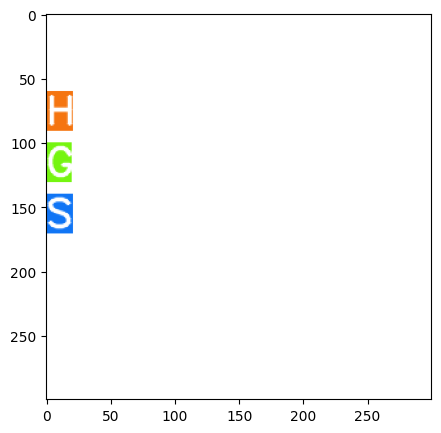

In [57]:
# Example: Simulating an image (Replace with actual frame)
image = np.ones((300, 300, 3), dtype=np.uint8) * 255  # White image for debugging

# Ensure `image` exists before visualization
if 'image' in locals():
    plt.figure(figsize=(5,5))
    plt.imshow(prob_viz(res, actions, image, colors))
else:
    print("⚠️ Error: `image` is not defined!")

In [58]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            #image = prob_viz(res, actions, image, colors)
            y_offset = 60  # Start position for text
            for i, action in enumerate(actions):
             prob_text = f"{action}: {res[i]:.2%}"  # Convert to percentage
             cv2.putText(image, prob_text, (10, y_offset),  
             cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
             y_offset += 40  # Move down for the next action
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            cap.release()
            cv2.destroyAllWindows()
            print("🛑 Video capture stopped. Exiting loop...")
            break  # ✅ Exit the while loop



<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


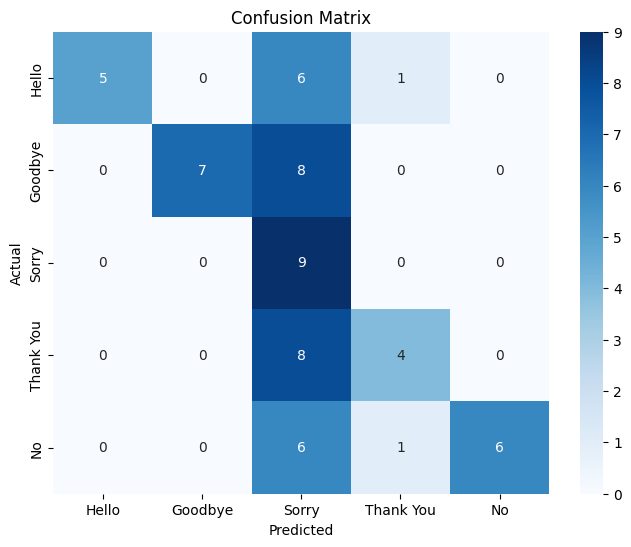

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = np.argmax(model.predict(X_val), axis=1)
y_true = np.argmax(y_val, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=actions, yticklabels=actions)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [60]:
import numpy as np
print(np.bincount(y_train.argmax(axis=1)))  # See if one class dominates


[49 46 52 49 48]


In [61]:
from sklearn.metrics import classification_report, f1_score
import numpy as np

# Get predicted class indices
y_pred = np.argmax(model.predict(X_val), axis=1)

# Get true class indices (since y_val is one-hot encoded)
y_true = np.argmax(y_val, axis=1)

# For the F1 score (macro = average across classes equally)
f1 = f1_score(y_true, y_pred, average='macro')  # You can also try 'weighted' or 'micro'

print(f"✅ F1 Score (macro): {f1:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
✅ F1 Score (macro): 0.5384


In [62]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=actions))


              precision    recall  f1-score   support

       Hello       1.00      0.42      0.59        12
     Goodbye       1.00      0.47      0.64        15
       Sorry       0.24      1.00      0.39         9
   Thank You       0.67      0.33      0.44        12
          No       1.00      0.46      0.63        13

    accuracy                           0.51        61
   macro avg       0.78      0.54      0.54        61
weighted avg       0.82      0.51      0.55        61



In [63]:
import shutil

# Path to the data folder
#DATA_PATH = "MP_Data"

# Delete the existing folder
#shutil.rmtree(DATA_PATH, ignore_errors=True)

#print("✅ Old dataset deleted. Ready to start fresh!")

In [64]:
# Optional: Delete saved model files
#import os

#shutil.rmtree("saved_model", ignore_errors=True)   # if using saved_model/
#if os.path.exists("sign.keras"):
 #   os.remove("sign.keras")

#print("✅ Old model deleted.")
